In [26]:
# Bibliotecas utilizadas 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso, Ridge, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from itertools import combinations
from collections import Counter

# Leitura e tratamento dos dados

In [3]:
data = pd.read_csv('desafio_indicium_imdb.csv', index_col=0)
data.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB


In [5]:
data['Gross'] = data['Gross'].astype(str)
data['Gross'] = data['Gross'].str.replace(',', '')
data['Gross'] = data['Gross'].str.replace('nan', '0')
data['Gross'] = data['Gross'].astype(int)
data['Runtime'] = data['Runtime'].str.replace(' min', '').astype(int)

# 1. Análise exploratória de dados (EDA)

## IMDB_Rating

Os 10 filmes mais bem avaliados do conjunto de dados:

In [6]:
data.head(10)[['Series_Title', 'IMDB_Rating', 'Director', 'Star1', 'Genre']]

,Series_Title,IMDB_Rating,Director,Star1,Genre
1,The Godfather,9.2,Francis Ford Coppola,Marlon Brando,"Crime, Drama"
2,The Dark Knight,9.0,Christopher Nolan,Christian Bale,"Action, Crime, Drama"
3,The Godfather: Part II,9.0,Francis Ford Coppola,Al Pacino,"Crime, Drama"
4,12 Angry Men,9.0,Sidney Lumet,Henry Fonda,"Crime, Drama"
5,The Lord of the Rings: The Return of the King,8.9,Peter Jackson,Elijah Wood,"Action, Adventure, Drama"
6,Pulp Fiction,8.9,Quentin Tarantino,John Travolta,"Crime, Drama"
7,Schindler's List,8.9,Steven Spielberg,Liam Neeson,"Biography, Drama, History"
8,Inception,8.8,Christopher Nolan,Leonardo DiCaprio,"Action, Adventure, Sci-Fi"
9,Fight Club,8.8,David Fincher,Brad Pitt,Drama
10,The Lord of the Rings: The Fellowship of the Ring,8.8,Peter Jackson,Elijah Wood,"Action, Adventure, Drama"


Os 10 filmes menos bem avaliados do conjunto de dados:

In [7]:
data.tail(10)[['Series_Title', 'IMDB_Rating', 'Director', 'Star1', 'Genre']]

,Series_Title,IMDB_Rating,Director,Star1,Genre
990,Giù la testa,7.6,Sergio Leone,Rod Steiger,"Drama, War, Western"
991,Kelly's Heroes,7.6,Brian G. Hutton,Clint Eastwood,"Adventure, Comedy, War"
992,The Jungle Book,7.6,Wolfgang Reitherman,Phil Harris,"Animation, Adventure, Family"
993,Blowup,7.6,Michelangelo Antonioni,David Hemmings,"Drama, Mystery, Thriller"
994,A Hard Day's Night,7.6,Richard Lester,John Lennon,"Comedy, Music, Musical"
995,Breakfast at Tiffany's,7.6,Blake Edwards,Audrey Hepburn,"Comedy, Drama, Romance"
996,Giant,7.6,George Stevens,Elizabeth Taylor,"Drama, Western"
997,From Here to Eternity,7.6,Fred Zinnemann,Burt Lancaster,"Drama, Romance, War"
998,Lifeboat,7.6,Alfred Hitchcock,Tallulah Bankhead,"Drama, War"
999,The 39 Steps,7.6,Alfred Hitchcock,Robert Donat,"Crime, Mystery, Thriller"


Descritiva sobre a avaliação no IMDB:

In [8]:
data.IMDB_Rating.describe()

count    999.000000
mean       7.947948
std        0.272290
min        7.600000
25%        7.700000
50%        7.900000
75%        8.100000
max        9.200000
Name: IMDB_Rating, dtype: float64

Distribuição das avaliações.

<AxesSubplot: >

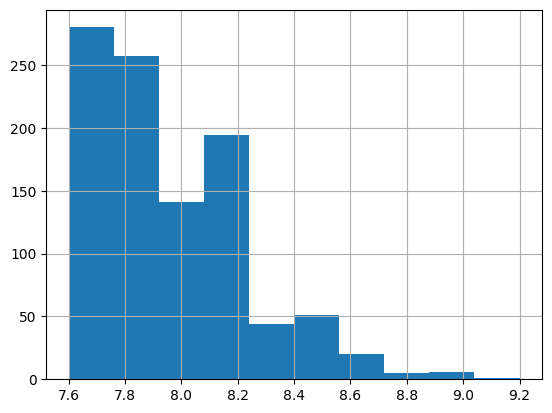

In [29]:
data.IMDB_Rating.hist()

Uma outra forma de mostrar essa distribuição das avaliações do IMDB:

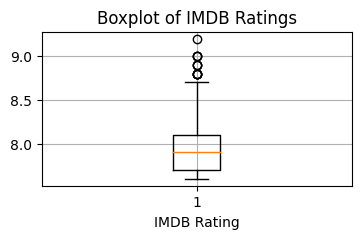

In [10]:
# Boxplot do IMDB_Ratings 
plt.figure(figsize=(4, 2))
plt.boxplot(data['IMDB_Rating'].dropna())
plt.title('Boxplot of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.grid(True)
plt.show()

## Genre

In [11]:
data.Genre.describe()

count       999
unique      202
top       Drama
freq         84
Name: Genre, dtype: object

O Gênero drama está atribuido individualmente em 84 filmes, por está no 'top', logo ele foi o gênero que mais apareceu individualmente nos filmes.

In [30]:
len(data[(data['Genre'] == 'Drama')]) # conferindo

84

Contabilizar a ocorrência de cada gênero individualmente e em conjunto de com outros gêneros.

In [31]:
# Contabilizar o total geral de ocorrência para cada gênero
genre = pd.DataFrame()
genre['Genre_list'] = data['Genre'].str.split(', ')
genre.explode('Genre_list').value_counts()

Genre_list
Drama         723
Comedy        233
Crime         209
Adventure     196
Action        189
Thriller      137
Romance       125
Biography     109
Mystery        99
Animation      82
Sci-Fi         67
Fantasy        66
History        56
Family         56
War            51
Music          35
Horror         32
Western        20
Film-Noir      19
Sport          19
Musical        17
dtype: int64

In [14]:
# Frequência de valores para gêneros agrupados
genre['Genre_list'].value_counts()

[Drama]                        84
[Drama, Romance]               37
[Comedy, Drama]                35
[Comedy, Drama, Romance]       31
[Action, Crime, Drama]         30
                               ..
[Adventure, Thriller]           1
[Animation, Action, Sci-Fi]     1
[Action, Crime, Comedy]         1
[Animation, Crime, Mystery]     1
[Adventure, Comedy, War]        1
Name: Genre_list, Length: 202, dtype: int64

Matriz de coocorrência de gêneros dos filmes por pares, ou seja , quantos filmes eles foram atribuidos em duplas de gêneros.

In [32]:
genre_combinations = genre['Genre_list'].apply(lambda x: list(combinations(x, 2)) if len(x) > 1 else [])
all_combinations = [item for sublist in genre_combinations for item in sublist]
coo_genre = Counter(all_combinations)

#DataFrame para visualização
data_coo = pd.DataFrame(coo_genre.items(), columns=['Pair', 'Count'])
data_coo[['Genre 1', 'Genre 2']] = pd.DataFrame(data_coo['Pair'].tolist(), index=data_coo.index)
data_coo = data_coo.drop(columns=['Pair'])
display(data_coo)

,Count,Genre 1,Genre 2
0,160,Crime,Drama
1,55,Action,Crime
2,77,Action,Drama
3,83,Action,Adventure
4,65,Adventure,Drama
...,...,...,...
130,1,History,Music
131,1,Comedy,Western
132,1,Action,Family
133,1,Animation,Romance


Média, máximo e mínimo das avaliações dos filmes por gênero.

In [44]:
data_rating_genre_mean = data.groupby('Genre')['IMDB_Rating'].mean().reset_index().rename(columns={'IMDB_Rating': 'IMDB_mean'})
data_rating_genre_max = data.groupby('Genre')['IMDB_Rating'].max().reset_index().rename(columns={'IMDB_Rating': 'IMDB_max'})
data_rating_genre_min = data.groupby('Genre')['IMDB_Rating'].min().reset_index().rename(columns={'IMDB_Rating': 'IMDB_min'})
data_rating_genre = data_rating_genre_min.merge(data_rating_genre_max, on='Genre').merge(data_rating_genre_mean, on='Genre')
data_rating_genre.head(10).sort_values(by='IMDB_mean', ascending=False)

,Genre,IMDB_min,IMDB_max,IMDB_mean
6,"Action, Adventure, Fantasy",7.8,8.7,8.20
0,"Action, Adventure",7.7,8.4,8.18
4,"Action, Adventure, Drama",7.6,8.9,8.15
2,"Action, Adventure, Comedy",7.6,8.2,7.91
1,"Action, Adventure, Biography",7.9,7.9,7.90
7,"Action, Adventure, History",7.9,7.9,7.90
8,"Action, Adventure, Horror",7.9,7.9,7.90
3,"Action, Adventure, Crime",7.6,7.6,7.60
5,"Action, Adventure, Family",7.6,7.6,7.60
9,"Action, Adventure, Mystery",7.6,7.6,7.60


## Gross

In [17]:
data['Gross'].info()

<class 'pandas.core.series.Series'>
Int64Index: 999 entries, 1 to 999
Series name: Gross
Non-Null Count  Dtype
--------------  -----
999 non-null    int64
dtypes: int64(1)
memory usage: 15.6 KB


In [18]:
data['Gross'].describe()

count    9.990000e+02
mean     5.656510e+07
std      1.032860e+08
min      0.000000e+00
25%      4.422285e+05
50%      1.068028e+07
75%      6.157656e+07
max      9.366622e+08
Name: Gross, dtype: float64

Filmes com maior faturamento em dólares.

In [19]:
data.nlargest(10, 'Gross')[['Series_Title', 'Gross']].sort_values(by='Gross', ascending=False)

,Series_Title,Gross
477,Star Wars: Episode VII - The Force Awakens,936662225
59,Avengers: Endgame,858373000
623,Avatar,760507625
60,Avengers: Infinity War,678815482
652,Titanic,659325379
357,The Avengers,623279547
891,Incredibles 2,608581744
2,The Dark Knight,534858444
582,Rogue One,532177324
63,The Dark Knight Rises,448139099


Filmes com menor faturamento em dólares.

In [20]:
data[data['Gross'] != 0].nsmallest(10, 'Gross')[['Series_Title', 'Gross']].sort_values(by='Gross', ascending=False)

,Series_Title,Gross
187,Dial M for Murder,12562
350,Dev.D,10950
190,All About Eve,10177
356,Tropa de Elite,8060
141,Udaan,7461
605,Ajeossi,6460
926,Dead Man's Shoes,6013
624,Mr. Nobody,3600
390,Knockin' on Heaven's Door,3296
630,Adams æbler,1305


## Meta_score

Descritiva da média ponderada de todas as críticas 

In [21]:
data['Meta_score'].describe()

count    842.000000
mean      77.969121
std       12.383257
min       28.000000
25%       70.000000
50%       79.000000
75%       87.000000
max      100.000000
Name: Meta_score, dtype: float64

## Director

In [22]:
data['Director'].describe()

count                  999
unique                 548
top       Alfred Hitchcock
freq                    14
Name: Director, dtype: object

Análise da avaliação IMDB de filme para cada diretor, média, máxima e mínima.

In [23]:
mean_ratings = data.groupby('Director')['IMDB_Rating'].mean().reset_index().rename(columns={'IMDB_Rating': 'IMDB_mean'})
max_ratings = data.groupby('Director')['IMDB_Rating'].max().reset_index().rename(columns={'IMDB_Rating': 'IMDB_max'})
min_ratings = data.groupby('Director')['IMDB_Rating'].min().reset_index().rename(columns={'IMDB_Rating': 'IMDB_min'})
data_director = mean_ratings.merge(max_ratings, on='Director').merge(min_ratings, on='Director')
display(data_director)

,Director,IMDB_mean,IMDB_max,IMDB_min
0,Aamir Khan,8.40,8.4,8.4
1,Aaron Sorkin,7.80,7.8,7.8
2,Abdellatif Kechiche,7.70,7.7,7.7
3,Abhishek Chaubey,7.80,7.8,7.8
4,Abhishek Kapoor,7.70,7.7,7.7
...,...,...,...,...
543,Zack Snyder,7.60,7.6,7.6
544,Zaza Urushadze,8.20,8.2,8.2
545,Zoya Akhtar,8.05,8.1,8.0
546,Çagan Irmak,8.30,8.3,8.3


Combinação de diretores e atores que mais faturaram no cinema.

In [24]:
gross_director_star = data.groupby(['Director', 'Star1', 'Star2', 'Star3',])['Gross'].sum().reset_index().sort_values(by='Gross', ascending=False)
gross_director_star.head(20)

,Director,Star1,Star2,Star3,Gross
226,David Yates,Daniel Radcliffe,Emma Watson,Rupert Grint,978953721
394,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,936662225
84,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,858373000
404,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,760507625
85,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,678815482
403,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,659325379
506,Joss Whedon,Robert Downey Jr.,Chris Evans,Scarlett Johansson,623279547
126,Brad Bird,Craig T. Nelson,Holly Hunter,Sarah Vowell,608581744
168,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,534858444
307,Gareth Edwards,Felicity Jones,Diego Luna,Alan Tudyk,532177324


Os 15 diretores que mais faturaram no cinema dessa base de dados.

In [72]:
gross_director = data.groupby('Director')['Gross'].sum().reset_index()
gross_director_star = data.groupby('Director')['Star1'].sum().reset_index()
gross_director.head(54).sort_values(by='Gross', ascending=False)

,Director,Gross
36,Anthony Russo,2205039403
30,Andrew Stanton,604651425
20,Alfonso Cuarón,582645455
33,Ang Lee,379292432
26,Andrew Adamson,267665011
14,Alejandro G. Iñárritu,247652802
44,Barry Levinson,227900000
27,Andrew Davis,183875760
45,Ben Affleck,156325721
22,Alfred Hitchcock,119109404


## Certificate

In [ ]:
data.Certificate.describe()

count     898
unique     16
top         U
freq      234
Name: Certificate, dtype: object

Média, máximo e mínimo das avaliações dos filmes por classificação etária.

,Certificate,IMDB_mean,IMDB_max,IMDB_min
0,16,8.100000,8.1,8.1
1,A,7.992347,9.2,7.6
2,Approved,7.945455,8.1,7.7
3,G,8.000000,8.5,7.6
4,GP,7.850000,8.1,7.6
5,PG,7.927027,8.6,7.6
6,PG-13,7.797674,8.6,7.6
7,Passed,8.020588,8.4,7.6
8,R,7.869863,8.6,7.6
9,TV-14,8.300000,8.3,8.3


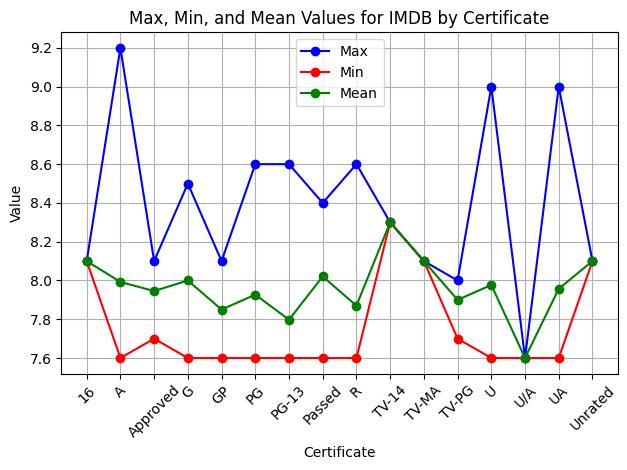

In [ ]:
data_certificate = data.groupby('Certificate')['IMDB_Rating'].mean().reset_index().sort_values(by='IMDB_Rating', ascending=False)

mean_ratings = data.groupby('Certificate')['IMDB_Rating'].mean().reset_index().rename(columns={'IMDB_Rating': 'IMDB_mean'})
max_ratings = data.groupby('Certificate')['IMDB_Rating'].max().reset_index().rename(columns={'IMDB_Rating': 'IMDB_max'})
min_ratings = data.groupby('Certificate')['IMDB_Rating'].min().reset_index().rename(columns={'IMDB_Rating': 'IMDB_min'})
data_certificate = mean_ratings.merge(max_ratings, on='Certificate').merge(min_ratings, on='Certificate')
display(data_certificate)
#plot
plt.plot(data_certificate['Certificate'], data_certificate['IMDB_max'], marker='o', linestyle='-', color='b', label='Max')
plt.plot(data_certificate['Certificate'], data_certificate['IMDB_min'], marker='o', linestyle='-', color='r', label='Min')
plt.plot(data_certificate['Certificate'], data_certificate['IMDB_mean'], marker='o', linestyle='-', color='g', label='Mean')
plt.xlabel('Certificate')
plt.ylabel('Value')
plt.title('Max, Min, and Mean Values for IMDB by Certificate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

O Faturamento médio em dólares por classificação etária.

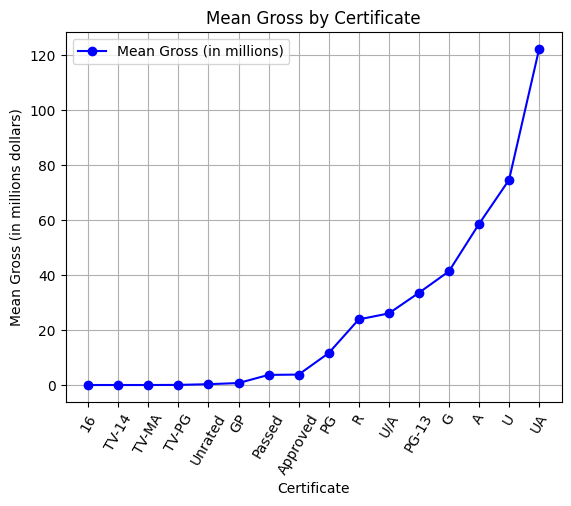

In [ ]:
data_certificate_by_gross = data.groupby('Certificate')['Gross'].mean().reset_index().sort_values(by='Gross')
plt.plot(data_certificate_by_gross['Certificate'], data_certificate_by_gross['Gross'] / 1e6, marker='o', linestyle='-', color='b', label='Mean Gross (in millions)')
plt.xticks(rotation=60)
plt.xlabel('Certificate')
plt.ylabel('Mean Gross (in millions dollars)')
plt.title('Mean Gross by Certificate')
plt.grid(True)
plt.legend()

Agora um dataframe com média, mínimo, máximo de avaliação do IMDB, também com faturamento médio e total por classificação etária.

In [ ]:
data_certificate = data_certificate.merge(data_certificate_by_gross, on='Certificate').sort_values(by='Gross', ascending=False)
data_certificate['Gross'] = data_certificate['Gross'] / 1e6
data_certificate.rename(columns={'Gross': 'Gross_mean'}, inplace=True)
all_gross = data.groupby('Certificate')['Gross'].sum().reset_index().sort_values(by='Gross')
data_certificate = data_certificate.merge(all_gross, on='Certificate')
data_certificate.sort_values(by='Gross', ascending=False)

,Certificate,IMDB_mean,IMDB_max,IMDB_min,Gross_mean,Gross
0,UA,7.957143,9.0,7.6,122.153089,21376790586
1,U,7.976923,9.0,7.6,74.569727,17449316129
2,A,7.992347,9.2,7.6,58.527257,11471342438
6,R,7.869863,8.6,7.6,23.850246,3482135918
4,PG-13,7.797674,8.6,7.6,33.510847,1440966426
3,G,8.000000,8.5,7.6,41.330271,495963257
7,PG,7.927027,8.6,7.6,11.603204,429318559
9,Passed,8.020588,8.4,7.6,3.676992,125017736
8,Approved,7.945455,8.1,7.7,3.790371,41694084
5,U/A,7.600000,7.6,7.6,26.020957,26020957


# 2. Any questions

## A. Qual filme você recomendaria para uma pessoa que você não conhece?

Recomendar um filme para uma pessoa desconhecida é um pouco complicado pois não sabemos qual gênero a pessoa gosta. Eu indicaria algum filme que seja para um público geral, com um pouco de drama ou história de superação ou que tenha boa avaliação no IMDB. Eu arriscaria em indicar o filme "O Menino do Pijama Listrado".
 

## B. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

Combinação de dados para inferir sobre o faturamento.

In [ ]:
gross_director_star_genre = data.groupby(['Released_Year','Director', 'Star1', 'Star2', 'Star3', 'Genre', 'IMDB_Rating',])['Gross'].sum().reset_index().sort_values(by='Gross', ascending=False)
gross_director_star_genre.head(20)

,Released_Year,Director,Star1,Star2,Star3,Genre,IMDB_Rating,Gross
884,2015,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,"Action, Adventure, Sci-Fi",7.9,936662225
969,2019,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,"Action, Adventure, Drama",8.4,858373000
733,2009,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,"Action, Adventure, Fantasy",7.8,760507625
954,2018,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,"Action, Adventure, Sci-Fi",8.4,678815482
468,1997,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,"Drama, Romance",7.8,659325379
800,2012,Joss Whedon,Robert Downey Jr.,Chris Evans,Scarlett Johansson,"Action, Adventure, Sci-Fi",8.0,623279547
956,2018,Brad Bird,Craig T. Nelson,Holly Hunter,Sarah Vowell,"Animation, Action, Adventure",7.6,608581744
702,2008,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,"Action, Crime, Drama",9.0,534858444
909,2016,Gareth Edwards,Felicity Jones,Diego Luna,Alan Tudyk,"Action, Adventure, Sci-Fi",7.8,532177324
795,2012,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,"Action, Adventure",8.4,448139099


São vários fatores que influenciam na expectativa de faturamento para o lançamento de um filme. Mas creio que seja um diretor com boa reputação, elenco de atores famosos que faturaram bem em outros filmes e um bom ênredo. Adicionando também o gênero do filme, como mostrado na análise acima a combinação entre 'Action', 'Adventure', 'Sci-Fi', 'Drama', e 'Animation' estão entre os filmes que mais geraram receita.

## C. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

In [ ]:
data['Overview']

1      An organized crime dynasty's aging patriarch t...
2      When the menace known as the Joker wreaks havo...
3      The early life and career of Vito Corleone in ...
4      A jury holdout attempts to prevent a miscarria...
5      Gandalf and Aragorn lead the World of Men agai...
                             ...                        
995    A young New York socialite becomes interested ...
996    Sprawling epic covering the life of a Texas ca...
997    In Hawaii in 1941, a private is cruelly punish...
998    Several survivors of a torpedoed merchant ship...
999    A man in London tries to help a counter-espion...
Name: Overview, Length: 999, dtype: object

A coluna 'OverView' por se tratar de dados textuais, podem oferecer palavras-chave que podemos usar para inferir sobre o gênero do filme. Para fazermos isso devemos utilizar técnicas para representação numérica como TF-IDF (Term Frequency-Inverse Document Frequency). Temos 'from sklearn.feature_extraction.text import TfidfVectorizer' para fazer isso no scikit learn. Após isso usar algum algoritmo de classificação.


# 3. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?


Vamos utilizar apenas as colunas com valores quantitativos: 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross'.

Pois as outras variáveis são qualitativas nominais e 'Genere' é uma qualitativa ordinal. 

Trabalhar com esse tipo de variavél requer tácnicas mais robustas, porém só irá deixar o código e os dados de treinamento maiores que no momento não seria interessante para o desafio em questão.

In [ ]:
var_predict = ['Runtime', 'Meta_score', 'No_of_Votes', 'Gross', 'IMDB_Rating']
data_train = data[var_predict]

#Excluir linhas com dados faltantes
data_train = data_train.dropna().copy()
data_train.head()

,Runtime,Meta_score,No_of_Votes,Gross,IMDB_Rating
1,175,100.0,1620367,134966411,9.2
2,152,84.0,2303232,534858444,9.0
3,202,90.0,1129952,57300000,9.0
4,96,96.0,689845,4360000,9.0
5,201,94.0,1642758,377845905,8.9


Separar dados de treino e teste

In [ ]:
X = data_train.drop('IMDB_Rating', axis=1)
y = data_train['IMDB_Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Estamos resolvendo um problema de regressão por se tratar de prever valores contínuos. Vamos fazer um teste com a regressão linear simples.

In [ ]:
# Criar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)
    
y_pred = model.predict(X_test)

Para medidas de desempenho do modelo de regressão, o Erro Quadrático Médio (MSE) é uma métrica  utilizada para avaliar a qualidade das previsões em relação aos valores reais. Quanto menor o valor do MSE, mais próximo as previsões do modelo estão dos valores reais.


In [ ]:
mean_squared_error(y_test, y_pred)

0.04398888551105618

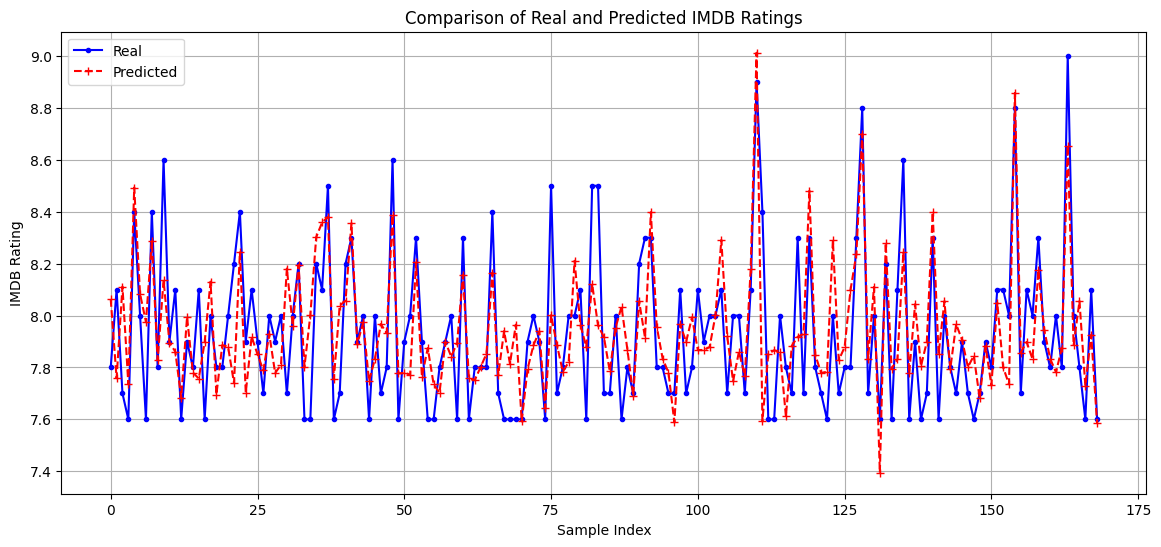

In [ ]:
results = pd.DataFrame({'Pred': y_pred})
results['Real'] = y_test.values

# valores reais e previstos
plt.figure(figsize=(14, 6))
plt.plot(results['Real'].values, label='Real', marker='.', linestyle='-', color='b')
plt.plot(results['Pred'].values, label='Predicted', marker='+', linestyle='--', color='r')
plt.xlabel('Sample Index')
plt.ylabel('IMDB Rating')
plt.title('Comparison of Real and Predicted IMDB Ratings')
plt.legend()
plt.grid(True)
plt.show()

O modelo de regressão linear mostrou bons resultados.

# 4. Testando o modelo com o filme dado como exemplo para saber a avaliação IMDB

O filme é https://www.imdb.com/title/tt0111161/, com avaliação de 9.3

In [ ]:
data_movie_dict = {
    'Series_Title': ['The Shawshank Redemption'],
    'Released_Year': ['1994'],
    'Certificate': ['A'],
    'Runtime': ['142 min'],
    'Genre': ['Drama'],
    'Overview': ['Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'],
    'Meta_score': [80.0],
    'Director': ['Frank Darabont'],
    'Star1': ['Tim Robbins'],
    'Star2': ['Morgan Freeman'],
    'Star3': ['Bob Gunton'],
    'Star4': ['William Sadler'],
    'No_of_Votes': [2343110],
    'Gross': ['28,341,469']
}

data_movie = pd.DataFrame(data_movie_dict)

In [ ]:
def feature_engineering(df):

    train = df.copy()
    
    train['Gross'] = train['Gross'].astype(str)
    train['Gross'] = train['Gross'].str.replace(',', '')
    train['Gross'] = train['Gross'].astype(int)

    train['Runtime'] = train['Runtime'].str.replace(' min', '').astype(int)
    
    return train

Agora, como o modelo de regressão linear simples treinado anteriormente vamos fazer a predição do valor de sua avaliação.

In [ ]:
x_move = feature_engineering(data_movie[['Runtime', 'Meta_score', 'No_of_Votes', 'Gross']])
display(x_move)
move_pred = model.predict(x_move)
print(f'valor previsto {move_pred}')

,Runtime,Meta_score,No_of_Votes,Gross
0,142,80.0,2343110,28341469


valor previsto [9.3116961]


Apenas com a regressão linear conseguimos prever o valor da avaliação como consta no site https://www.imdb.com/title/tt0111161/, com avaliação de 9.3

Agora vamos testar outros modelos de regressão

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
}

In [ ]:
results_linear = []
for model in models:
    
    model_test = models[model]
    model_test.fit(X_train, y_train)
        
    y_pred = model_test.predict(X_test)
    results_linear.append(y_pred)
    print(f'{model}')
    print(mean_squared_error(y_test, y_pred))

Linear Regression
0.04398888551105618
Ridge
0.04398886771999432
ElasticNet
0.046292871919098276
Lasso
0.051577223703582094


In [ ]:
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
ridge_pred = model_ridge.predict(x_move)
ridge_pred

array([9.31169606])

# MPLR

Testando o Multi-layer Perceptron regressor (Regressor Perceptron de múltiplas camadas)


In [ ]:
var_predict = ['Runtime', 'Meta_score', 'No_of_Votes', 'Gross', 'IMDB_Rating']

In [ ]:
data_train = data[var_predict]
data_train = data_train.dropna(axis=0)

X = data_train.drop('IMDB_Rating', axis=1)
X = StandardScaler().fit_transform(X)
y = data_train['IMDB_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_regressor = MLPRegressor(max_iter=50000, hidden_layer_sizes=(10,20), batch_size=1)
model_regressor.fit(X_train, y_train)

predict_acuracy = model_regressor.predict(X_test)

In [ ]:
mean_squared_error(predict_acuracy, y_test)

0.04581116702755796

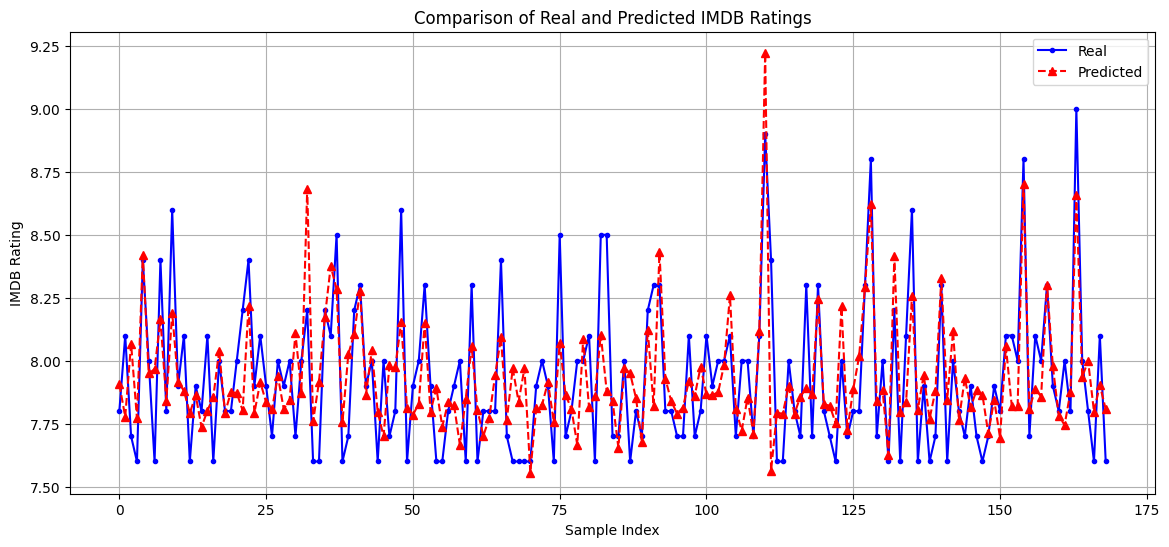

In [ ]:
results = pd.DataFrame({'Pred': predict_acuracy})
results['Real'] = y_test.values

# Plotar os valores reais e previstos
plt.figure(figsize=(14, 6))
plt.plot(results['Real'].values, label='Real', marker='.', linestyle='-', color='b')
plt.plot(results['Pred'].values, label='Predicted', marker='^', linestyle='--', color='r')
plt.xlabel('Sample Index')
plt.ylabel('IMDB Rating')
plt.title('Comparison of Real and Predicted IMDB Ratings')
plt.legend()
plt.grid(True)
plt.show()

Testando novamente com o filme dado de exemplo no teste.

In [ ]:
data_movie_pred = feature_engineering(data_movie[['Runtime', 'Meta_score', 'No_of_Votes', 'Gross']])
data_movie_pred = StandardScaler().fit_transform(data_movie_pred)
model_regressor.predict(data_movie_pred)

array([7.84381632])

Embora o modelo de MLPRegressor tenha um bom desempenho, ele não previu corretamente o valor do filme que foi disponibilizado para teste.

In [ ]:
# Guardar todos os resultados em um DataFrame
results_all = pd.DataFrame({'LR': results_linear[0],'Rid': results_linear[1], 'EL': results_linear[2] ,'Lasso': results_linear[3],'MLP': predict_acuracy, 'Real': y_test})

In [ ]:
results_all.head()

,LR,Rid,EL,Lasso,MLP,Real
628,8.063343,8.063343,8.056285,8.060094,7.906431,7.8
284,7.758759,7.758759,7.776889,7.789276,7.777449,8.1
767,8.111456,8.111456,8.084500,8.068301,8.067835,7.7
892,7.735981,7.735981,7.737937,7.734919,7.771852,7.6
69,8.493218,8.493218,8.506530,8.512949,8.420191,8.4


# Save model

In [ ]:
import joblib
joblib.dump(model, f'model_linear_regression.pkl')

['model_linear_regression.pkl']